<a href="https://colab.research.google.com/github/kaho0/Aaagh-more-math/blob/main/ML_Mid_Term_Exam_Question_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [12]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

In [13]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1.sort()
arr_q1=np.array(data_q1)
median=np.median(arr_q1)
mean=np.mean(arr_q1)
std=np.std(arr_q1)
Q1=np.percentile(arr_q1,25)
Q3=np.percentile(arr_q1,75)
IQR=Q3-Q1
lower_Fence=Q1-1.5*IQR
upper_fence=Q1+1.5*IQR
outliers=arr_q1[(arr_q1<lower_Fence)|(arr_q1>upper_fence)]
print("Median:",median)
print("IQR:",IQR)
print("Outliers:",outliers)
print("Mean:",mean)
print("Standard Deviation:",std)
data_q1


Median: 33.0
IQR: 2.0
Outliers: [500]
Mean: 79.4
Standard Deviation: 140.2071324861899


[30, 31, 32, 32, 33, 33, 34, 34, 35, 500]

**Q1 Answer**
Mean and standard deviation are affected by extreme outliers,in this case all spending is between 30-35,500 is extreme outlier,this makes mean go far away ,median  shows the middle value,median is not affected by 500,because it just takes center position.IQR also ignores outliers,it only looks at middle 50% data.Here median and IQR will predict better than mean and std

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer

Probability of disease P(D)=1%=0.01
Probability of No Disease P(-D)=1-0.01=0.99
Sensitivity=True Positive Rate P(+|D)=90%=0.90
Specificity=True Negative Rate P(-|-D)=92%=0.92

False Positive Rate=P(+|-D)=1-Specificity=1-0.92=0.08

Bayes,P(D|+)= (P(+|D)xP(D))/P(+)

Now,P(+)=[P(+|D)xP(D)]+[P(+|-D)*P(-D)]

p(+)=0.0882

PPV=(P(+|D)xP(D))/P(+)
so,PPV=10.2%
Numerator = 0.90x0.20 = 0.18
False positive = 0.08x0.80 = 0.064
Denominator=0.18x0.064 =0.244

PPV = 0.18 / 0.244 =73.8%

*When disease is more common, PPV becomes bigger. Because now more people are already sick. So positive test is more true. False positive becomes less important. That is why PPV increases.*

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

1.This is a binary classification problem,the target premium_user has two values: 0 or 1.

2.*Four Preprocessing Steps*:

* Handle missing values

* Encode the categorical feature region (using one-hot encoding)

* Scale numeric features like age and daily_clicks.

* Check and handle outliers in daily_clicks

3.Firstly dataset is checked is there any missing values available,then missing values are handles.Incase of outliers they are also scaled by any scaler for example: robust,minmax or any scaler.And in case of categorical column it is encoded by preferable encoder.After encoding they are splited into train and test data and a suitable classification model is used to train the data,after training model is tested by test dataset.Then performence is measured using accuracy,precision,recall,f1 score and confusion matrix.Finally the best model is selected for prediction.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [14]:
# Q4

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


'Missing Values:'

,0
age,2
region,0
purchases,1
premium_user,0


'Unique Values:'

,0
age,5
region,4
purchases,6
premium_user,2


'Correlation:'

,age,purchases,premium_user
age,1.000000,0.923677,0.789534
purchases,0.923677,1.000000,0.825860
premium_user,0.789534,0.825860,1.000000


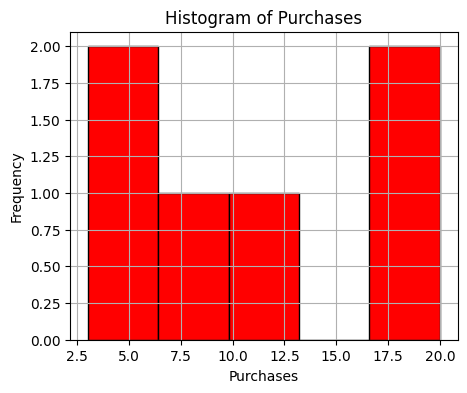

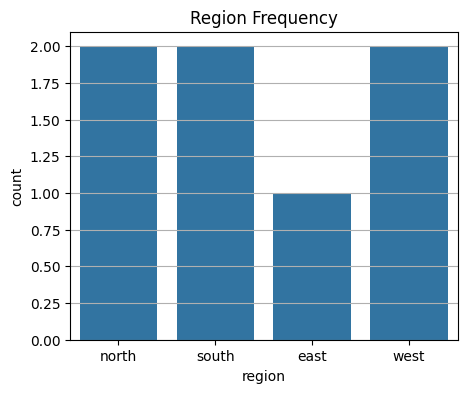

In [19]:
# Q4 (1No ans)
missing_val=df.isnull().sum() #missing value summary for each column.
unique_val=df.nunique()  #number of unique values per column.
numeric_cols = ['age', 'purchases', 'premium_user'] #correlation among numeric columns.
corr = df[numeric_cols].corr()
display("Missing Values:",missing_val)
display("Unique Values:",unique_val)
display("Correlation:",corr)

plt.figure(figsize=(5,4))
plt.hist(df['purchases'].dropna(), bins=5, color='red', edgecolor='black')
plt.title('Histogram of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='region', data=df)
plt.title('Region Frequency')
plt.show()


In [20]:
# Q4 (2No ans)
# Impute missing values
df['age'] = df['age'].fillna(df['age'].median())  # Replace NaN in age with median
df['purchases'] = df['purchases'].fillna(df['purchases'].mean())  # Replace NaN in purchases with mean
#One-Hot Encode region
df_region = pd.get_dummies(df['region'], prefix='region', dtype=int)
df = pd.concat([df, df_region], axis=1)
df = df.drop('region', axis=1)  # drop original categorical column

#RObust scaling
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df['high_spender'] = (df['purchases'] > df['purchases'].median()).astype(int)
#Final DF
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west,high_spender
0,-0.5,-0.943820,0.0,0,1,0,0,0
1,0.0,0.000000,1.0,0,0,1,0,0
2,0.0,-0.674157,0.0,0,1,0,0,0
3,-0.8,0.112360,0.0,1,0,0,0,1
4,1.5,1.348315,1.0,0,0,0,1,1
5,2.2,1.078652,1.0,0,0,0,1,1
6,0.0,-0.134831,0.0,0,0,1,0,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [16]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [17]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._